# Implementation Assignment 1

# setup

In [61]:
#setting up packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]
train_data_source = "PA1_dev.csv.xls"

In [65]:
#load training data
df_original = pd.read_csv(train_data_source)
df_original.sample(5)

,dummy,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3933,1,952000725,10/21/2014,2,1.00,990,4313,1.5,0,2,...,990,0,1917,0,98126,47.5677,-122.380,1480,5750,4.420
5144,1,3630080070,7/10/2014,3,2.50,1500,2255,2.0,0,0,...,1500,0,2005,0,98029,47.5538,-121.997,1440,2040,3.480
3898,1,7011201087,8/4/2014,3,1.75,1220,1450,1.0,0,0,...,620,600,1905,0,98119,47.6361,-122.368,1660,2960,3.850
2471,1,5412400180,4/17/2015,3,2.50,1400,7629,1.0,0,0,...,1120,280,1988,0,98030,47.3788,-122.179,1530,7688,2.675
3546,1,6388920410,4/23/2015,3,2.50,2370,7916,2.0,0,0,...,2370,0,1990,0,98056,47.5280,-122.171,2500,8221,6.550


# correlation matrix

In [66]:
corr = df_original.corr()
corr

,dummy,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
dummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,1.000000,-0.018657,-0.003081,-0.026438,-0.145325,0.008353,-0.005692,0.015700,-0.008752,...,-0.025893,-0.006377,0.009587,-0.015913,0.005675,0.001908,0.015594,-0.001320,-0.152847,-0.028684
bedrooms,NaN,-0.018657,1.000000,0.523676,0.583324,0.065087,0.170210,0.004246,0.079085,0.017975,...,0.477748,0.313666,0.159238,0.034665,-0.148695,-0.017386,0.121579,0.389808,0.051609,0.309099
bathrooms,NaN,-0.003081,0.523676,1.000000,0.755594,0.128755,0.488071,0.083064,0.166465,-0.124994,...,0.678969,0.295132,0.507275,0.078944,-0.213801,0.032663,0.224958,0.552316,0.106750,0.530985
sqft_living,NaN,-0.026438,0.583324,0.755594,1.000000,0.214819,0.346342,0.110952,0.258177,-0.066876,...,0.873630,0.436741,0.321563,0.077134,-0.204819,0.071961,0.242332,0.747049,0.202689,0.704283
sqft_lot,NaN,-0.145325,0.065087,0.128755,0.214819,1.000000,0.004927,0.015368,0.089750,0.000673,...,0.215222,0.042886,0.054258,0.016551,-0.131638,-0.101253,0.246212,0.162132,0.653227,0.099456
floors,NaN,0.008353,0.170210,0.488071,0.346342,0.004927,1.000000,0.032251,0.027718,-0.269468,...,0.518940,-0.248743,0.486480,0.023869,-0.059025,0.069803,0.109582,0.285160,0.002356,0.256372
waterfront,NaN,-0.005692,0.004246,0.083064,0.110952,0.015368,0.032251,1.000000,0.419430,0.009995,...,0.064117,0.109122,-0.033149,0.167719,0.024952,-0.015468,-0.037181,0.088974,0.040422,0.272693
view,NaN,0.015700,0.079085,0.166465,0.258177,0.089750,0.027718,0.419430,1.000000,0.042195,...,0.137984,0.274647,-0.071436,0.143245,0.101073,0.006533,-0.088341,0.257405,0.094508,0.358282
condition,NaN,-0.008752,0.017975,-0.124994,-0.066876,0.000673,-0.269468,0.009995,0.042195,1.000000,...,-0.171948,0.180669,-0.339971,-0.074928,-0.019222,-0.016207,-0.092553,-0.092924,0.012615,0.017883


# Part 0

## 0 a:

In [67]:
#removing id feature
df = df_original.drop(["id"], 1)
df.sample(5)

,dummy,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
4981,1,8/20/2014,3,1.50,1520,7200,1.0,0,0,4,...,1160,360,1990,0,98198,47.3855,-122.302,1460,7200,2.7995
52,1,4/15/2015,4,1.75,1490,10000,1.0,0,0,4,...,1100,390,1969,0,98023,47.3099,-122.379,2190,8910,2.6900
2989,1,9/21/2014,5,2.25,3270,16553,2.0,0,2,5,...,2470,800,1968,0,98040,47.5428,-122.236,3690,17916,11.8000
2253,1,4/1/2015,4,2.25,1810,7068,2.0,0,0,5,...,1810,0,1976,0,98034,47.7319,-122.204,1460,7274,4.8500
2047,1,4/24/2015,3,2.25,3330,20053,2.0,0,0,3,...,3330,0,1968,1998,98004,47.6395,-122.214,2870,20053,18.2000


Since the **id** feature works as an **identifier** for the datapoint and is **not related to the price** of the houses, it is a bad idea to use it in learning. We can see that the [Correlation](#correlation-matrix) for id and price is `-0.028` which is low compared to other correlations

## 0 b:

In [68]:
#setup
df_original["date"] = pd.to_datetime(df_original["date"])
df_original["month_of_year"] = df_original['date'].apply(lambda x: x.month)
df_original["day_of_month"] = df_original['date'].apply(lambda x: x.day)
df_original["year"] = df_original['date'].apply(lambda x: x.year)


## splitting date into month day and year

In [69]:
df_original[["date", "month_of_year", "day_of_month", "year"]].sample(5)

,date,month_of_year,day_of_month,year
3559,2015-03-06,3,6,2015
806,2014-08-01,8,1,2014
5511,2014-05-14,5,14,2014
3566,2014-08-20,8,20,2014
296,2014-09-05,9,5,2014


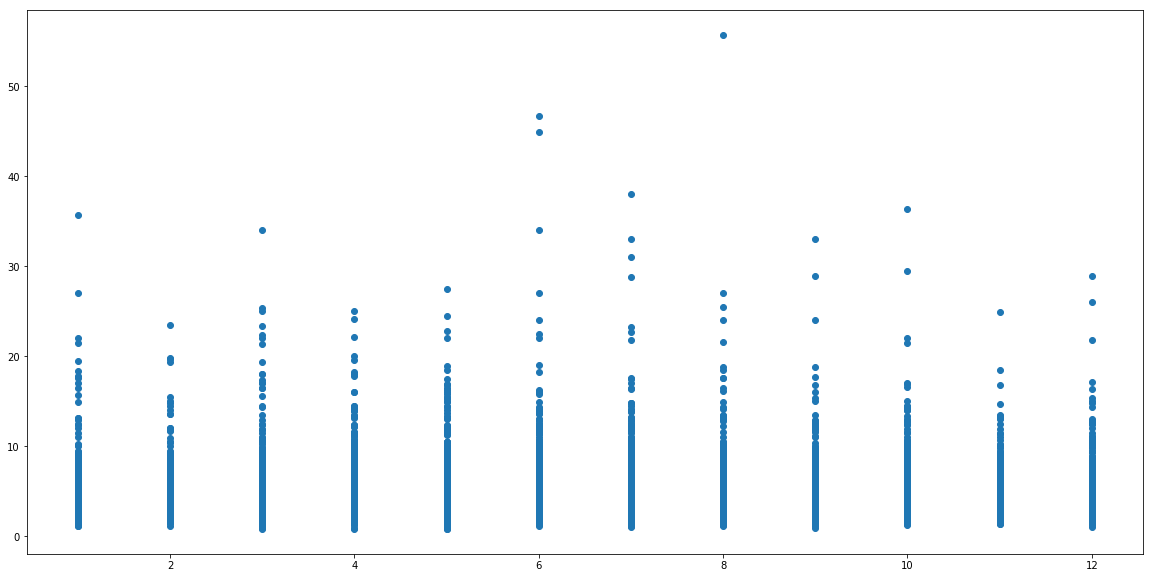

In [70]:
plt.scatter(df_original["month_of_year"], df_original["price"])

Here in the above `figure` we can see that the month feature retrieved from date can give us insights about the **effect of seasons** on the house prices. Therefore the date feature can be useful to extract such information.

## 0 c:

In [71]:
#helper functions
def stats(dataframe):
    stats = dataframe.describe()
    stats = stats.drop(["count", "25%", "50%", "75%",], 0)
    stats.loc["range"] = stats.loc["max"] - stats.loc["min"]
    return stats

def ordinal_stats(dataframe):
    args = dataframe.columns.tolist()
    stats = dataframe.describe()
    frequency = [pd.Series((dataframe[x].value_counts() / dataframe[x].count())*100) for x in args]
    return pd.DataFrame(frequency)

## ordinal data stats

In [72]:
df_ordinal = df[["waterfront","grade","condition"]]
ordinal_stats(df_ordinal)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
waterfront,99.213865,0.786135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,0.017867,0.160800,1.250670,9.147758,41.16491,28.81901,12.524567,5.020547,1.41147,0.446668,0.035733
condition,NaN,0.142934,0.929069,65.106307,26.013936,7.807754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## numerical data stats

In [73]:
df_non_ordinal = df.drop(["waterfront","grade","condition"], 1)
stats(df_non_ordinal)

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
mean,1.0,3.365910,2.111354,2073.001251,1.460138e+04,1.487315,0.229945,1784.972307,288.028944,1971.067536,88.084510,98077.312131,47.560523,-122.213616,1977.859389,12812.609970,5.375175
std,0.0,0.905331,0.763625,906.843038,3.842255e+04,0.536898,0.766417,817.074895,441.959342,29.172653,409.997947,52.970830,0.139036,0.140987,669.918412,27162.270685,3.561418
min,1.0,1.000000,0.750000,390.000000,6.090000e+02,1.000000,0.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.511000,670.000000,651.000000,0.780000
max,1.0,9.000000,8.000000,13540.000000,1.024068e+06,3.500000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000,55.700000
range,0.0,8.000000,7.250000,13150.000000,1.023459e+06,2.500000,4.000000,9020.000000,4820.000000,115.000000,2015.000000,198.000000,0.615400,1.196000,5540.000000,434077.000000,54.920000


## 0 d:

Based on the meaning of the features as well as the statistics observed in [Correlation matrix](#correlation-matrix), the following features seem to have greater significance<br/>
**'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view','grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'**<br/>
Additionally, we can use the **zipcode** feature which can give us information if the location of the house affects the price of the house.

<BarContainer object of 5597 artists>

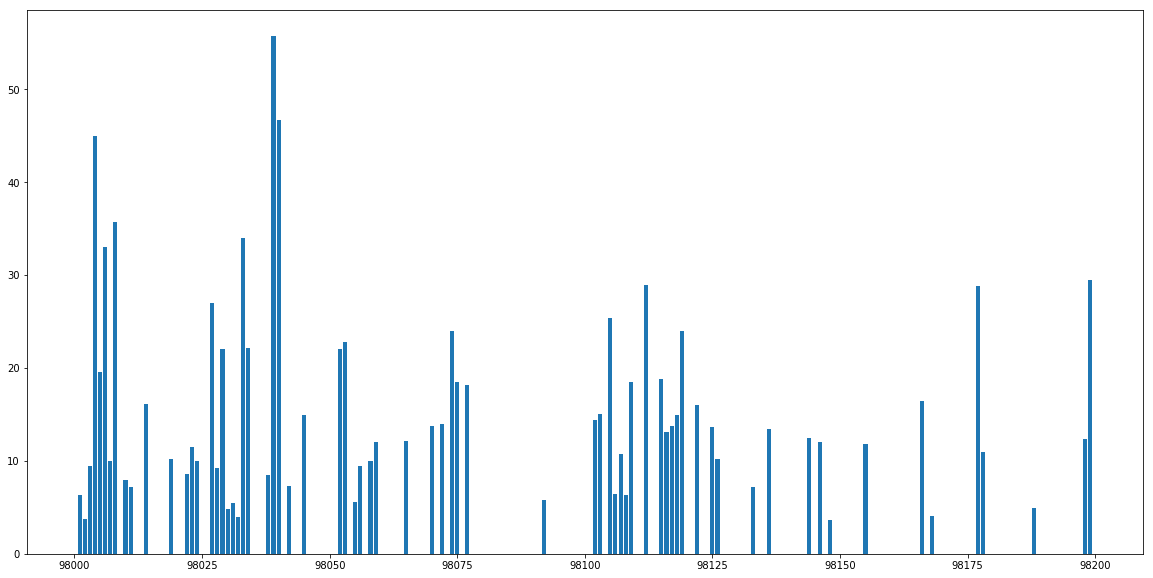

In [74]:
plt.bar(df_original["zipcode"], df_original["price"])

From the `above figure`, we can observe that the price of houses are high for certain zipcodes.

`Few examples of high correlation features`

## bedrooms

<BarContainer object of 5597 artists>

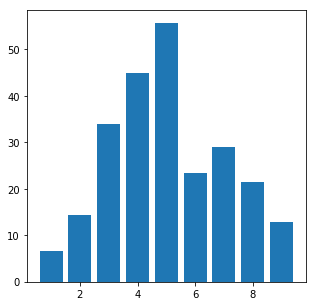

In [75]:
plt.rcParams["figure.figsize"] = [5,5]
plt.bar(df_original["bedrooms"], df_original["price"])

## bathrooms

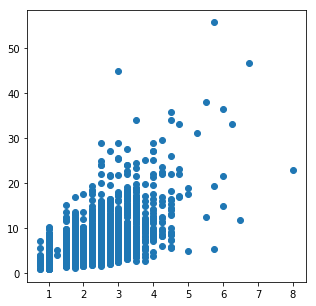

In [76]:
plt.scatter(df_original["bathrooms"], df_original["price"])

## floors

<BarContainer object of 5597 artists>

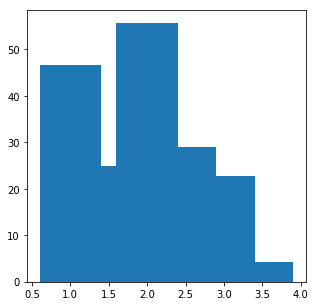

In [77]:
plt.bar(df_original["floors"], df_original["price"])

## view

<BarContainer object of 5597 artists>

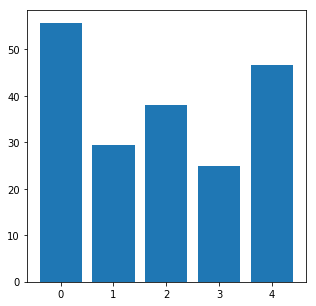

In [78]:
plt.bar(df_original["view"], df_original["price"])

## 0 e:

In [79]:
#selecting useful features
df = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
      'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]

In [80]:
#normalizing dataframe
df = (df - df.min()) / (df.max() - df.min())
df.sample(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
1445,0.375,0.241379,0.139924,0.0,0.0,0.0,0.5,0.115299,0.165975,0.812642,0.234657
1408,0.375,0.241379,0.140684,0.0,0.0,0.0,0.5,0.127494,0.145228,0.868216,0.232852
2232,0.375,0.172414,0.180228,0.0,0.0,0.0,0.6,0.191796,0.132780,0.356841,0.339350
1189,0.375,0.310345,0.149810,0.0,0.0,0.5,0.4,0.118625,0.186722,0.568411,0.330325
386,0.250,0.137931,0.109506,0.0,0.0,0.0,0.5,0.133038,0.049793,0.555086,0.180505


In [81]:
#adding dummy back to df
df["dummy"] = df_original["dummy"]

## result

In [82]:
df.sample(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
2719,0.250,0.310345,0.152091,0.2,0.0,0.0,0.5,0.221729,0.000000,0.474976,0.157040,1
1102,0.125,0.034483,0.041825,0.0,0.0,0.0,0.3,0.060976,0.000000,0.610497,0.119134,1
5498,0.250,0.172414,0.097338,0.0,0.0,0.0,0.4,0.141907,0.000000,0.052974,0.180505,1
3688,0.250,0.103448,0.076806,0.0,0.0,0.0,0.4,0.111973,0.000000,0.989438,0.148014,1
4725,0.250,0.034483,0.081369,0.0,0.0,0.0,0.4,0.096452,0.041494,0.853591,0.137184,1


# Part 1

## 1 a:

**10^−4, 10^−5, 10^−6, 10^−7** learning rates are good for this particular dataset.<br/>
**10^0, 10^−1, 10^−2, 10^−3** make the gradient descent explode.

In [83]:
#helper functions
all_info = {}
def check_explode(norm):
    does_explode = True
    for i in range(1,len(norm)-1):
        if norm[i]<norm[i-1]:
            does_explode = False
    return does_explode

def calculate_weights_and_sse(learning_rate,max_iteration,check_iter_for_explode, df=df, all_info = all_info):
    weight = np.array(np.random.randn(1,12)[0])
    number_of_iteration = 0
    sse_for_each_iter = [] 
    norm_for_this_lr = []
    while True:
        diff_in_y = df.dot(weight)-y_train
        gradient = (np.transpose(df)).dot(diff_in_y)
        weight = weight - learning_rate*gradient
        sse = (np.transpose(diff_in_y)).dot(diff_in_y)
        norm_for_gradient = math.sqrt(gradient.dot(gradient))
        #print('number of iteration',number_of_iteration,norm_for_gradient,'   sse =',sse)
        sse_for_each_iter.append(sse)
        norm_for_this_lr.append(norm_for_gradient)
        number_of_iteration = number_of_iteration + 1
        if(norm_for_gradient<=0.5): 
            all_info[learning_rate] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            #print("########################")
            #print("number of itertion used for learning_rate =",learning_rate , " is ",number_of_iteration , 'and sse is ' ,sse)
            #print("########################")
            break
        if(number_of_iteration == check_iter_for_explode and check_explode(norm_for_this_lr)):
            
            #print('Gradient explodes for learning_rate =',learning_rate)
            all_info[learning_rate] = {"whether converged":False,
                               "weights":np.array(np.zeros(12)),
                               "sse_for_each_iteration":np.array([-1]*12),
                               "number_of_iteration_used":number_of_iteration
                              }
            break  
        if(number_of_iteration==max_iteration):
    
            all_info[learning_rate] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            #print("converges but takes too many iterations  for lambda =",learning_rate)
            break 
        #if (number_of_iteration%5000)==0:
            #print('number of iteration',number_of_iteration,norm_for_gradient,sse)
    #print('checked for learning rate = ',learning_rate," now returning")
    return

In [ ]:
#Calculating weights and SSE
y_train = df_original["price"]
lr = [1,0.1,0.01,0.001,0.0001]
for x in lr:
    print('doing everything for learning rate = ',x)
    calculate_weights_and_sse(x,200000,40)

## non converging SSE

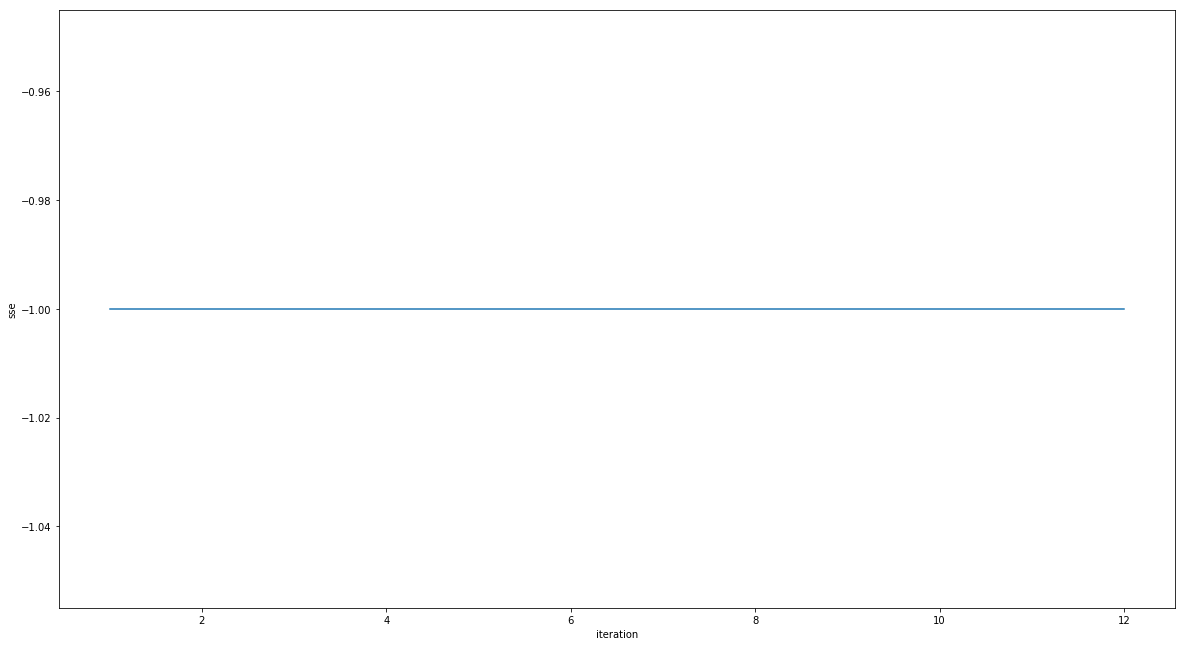

In [62]:
y=all_info[1]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="husl")

## converging SSE

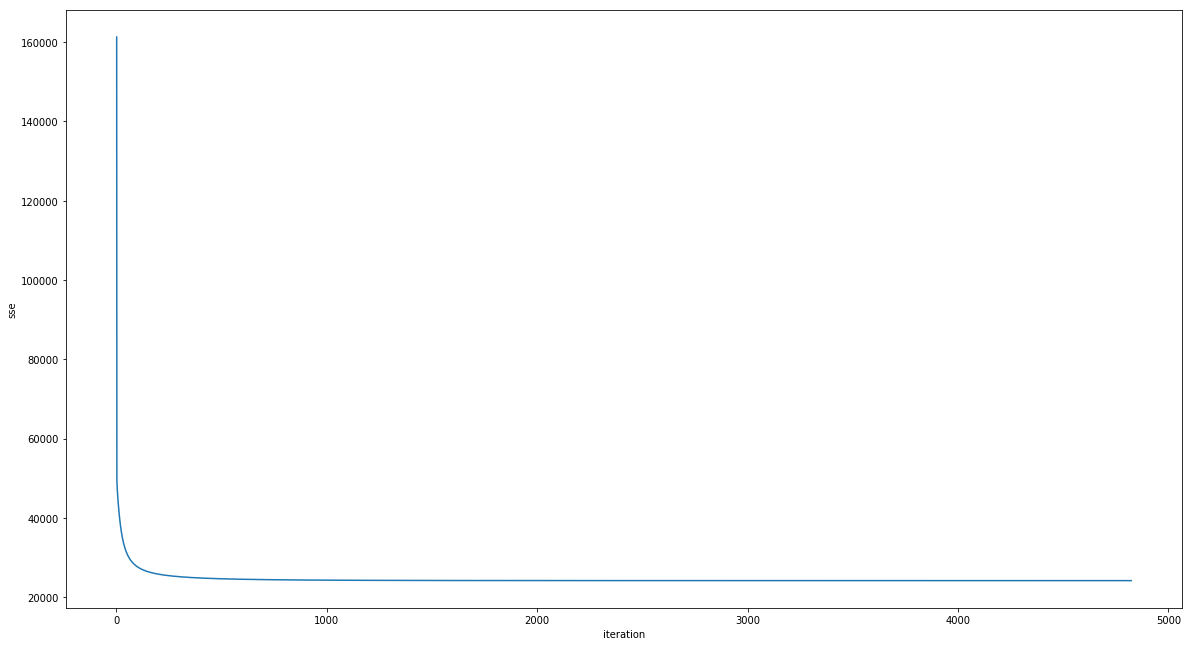

In [64]:
y=all_info[0.0001]['sse_for_each_iteration']
iteration = np.array([x for x in range(1,len(y)+1)])
data = pd.DataFrame({'iteration':iteration ,'sse':np.array(y)})

a4_dims = (20, 11)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x='iteration',y='sse',data=data,palette="Set1")

## 1 b: